# XGBoost.

XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. It is an improvement of the Random Forests. In this method the cases that have failed previously in their classification have more importance for the model, so they are used again in next samples to try to classify them correctly.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lc_data = pd.read_csv("loan_clean.csv")
lc_data.drop('Unnamed: 0', inplace=True, axis=1)

In [3]:
lc_data

,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,...,tax_liens,total_bal_ex_mort,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,debt_settlement_flag_Y
0,11575.0,0.0735,153000.0,1.0,16.99,0.0,720.0,0.0,20.0,1.0,...,0.0,100865.0,0,1,0,0,0,1,0,0
1,7200.0,0.2485,50000.0,1.0,6.07,0.0,685.0,0.0,4.0,0.0,...,0.0,5588.0,0,0,1,0,0,1,0,0
2,7500.0,0.0735,110000.0,1.0,13.12,0.0,710.0,2.0,19.0,0.0,...,0.0,45955.0,1,0,0,0,0,1,0,0
3,10000.0,0.1602,51979.0,1.0,10.11,0.0,690.0,0.0,15.0,2.0,...,0.0,10956.0,0,0,1,0,0,1,0,0
4,14000.0,0.1602,75000.0,1.0,10.86,1.0,685.0,0.0,4.0,0.0,...,0.0,27684.0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406070,11575.0,0.1559,25400.0,1.0,27.08,0.0,680.0,0.0,9.0,0.0,...,0.0,19798.0,0,0,0,1,0,0,0,0
406071,12000.0,0.1199,63000.0,0.0,23.69,1.0,685.0,0.0,13.0,0.0,...,0.0,112990.0,1,0,0,1,0,0,0,0
406072,13000.0,0.1599,35000.0,0.0,30.90,0.0,680.0,0.0,9.0,1.0,...,0.0,34178.0,0,0,0,1,0,1,0,0
406073,12000.0,0.1999,64400.0,0.0,27.19,1.0,695.0,2.0,17.0,0.0,...,0.0,58418.0,0,0,1,0,0,1,0,0


In [4]:
y = lc_data['loan_status']
X = lc_data.drop('loan_status', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

In [15]:
%%time

gs_xgb = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=500, subsample=0.75,
                                                             colsample_bytree = 0.75,objective= 'binary:logistic',
                                                             scale_pos_weight = 1, seed= 42, nthread = 5), 
                               param_grid = {'learning_rate':np.arange(0.1,1.0,0.2),'gamma': [0.5, 1, 1.5]}, 
                               scoring='roc_auc',
                               n_jobs = -1,
                               iid=False, 
                               cv=3)
gs_xgb.fit(x_train, y_train)

/Users/ikeraguirreotaegui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


CPU times: user 16min 9s, sys: 2.05 s, total: 16min 11s
Wall time: 1h 38min 34s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.75, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None, nthread=5,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=42,
                                     subsample=0.75, 

In [16]:
gs_xgb_optimum = gs_xgb.best_estimator_
gs_xgb_optimum.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=5, nthread=5, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=0.75, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [17]:
y_pred = gs_xgb_optimum.predict(x_test)

Accuracy train:  0.9941324419811135
Accuracy test: 0.9842098523429111


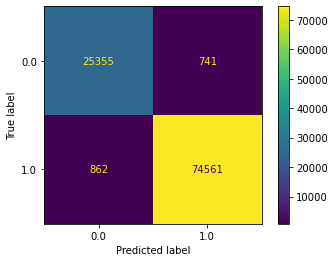

In [26]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
plot_confusion_matrix(gs_xgb_optimum, x_test, y_test)
print("Accuracy train: ", metrics.accuracy_score(y_train, gs_xgb_optimum.predict(x_train)))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

The accuracy in both the train and the test sets has been pretty similar. It looks like there is no severe overfitting or underfitting, which is good news.
Only 862 of fully paid loans (1%) have misplaced, while the 2,8% of defaults have been identified as paid loans.

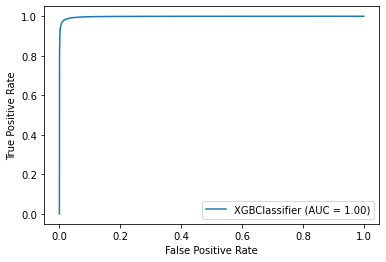

In [27]:
metrics.plot_roc_curve(gs_xgb_optimum, x_test, y_test)
plt.show() 

In [23]:
import pickle

def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [24]:
save_models('xgb_model.sav', gs_xgb_optimum)